<a href="https://colab.research.google.com/github/ramonserrano76/ProyectoDataScienceML-/blob/principal/Entrega_Final_14_6_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

:#PRESENTACIÓN DE LA EMPRESA - PREGUNTAS Y OBJETIVOS DE LA INVESTIGACIÓN

PRESENTACIÓN DE LA EMPRESA:
Buenas tardes, somos INTEGDATA Services S.A. y vamos a desarrollar un trabajo de Data Science, ya que nos  contrató la prestigiosa revista económica Taiwanesa, Taiwan Economic Journal, para llevar adelante un proyecto  utilizando sus datos de seguimiento financiero de empresas entre 1999-2009, con la finalidad de que se pueda predecir futuras bancarrotas en las empresas en base a los datos y experiencia recabadas de las empresas. Para ello, nos descargamos los datos de la URL: https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction/download.


PREGUNTAS Y OBJETIVOS DE LA INVESTIGACIÓN

Con la data suministrada nos proponemos:

1.- Investigar los ditintos factores que influyen en la performance financiera de las empresas en cuanto a si estan o no cerca de caer en bancarrota.

2.- Trazar una estratégia de análisis de datos que nos ayude a preparar la data para ser utilizada para los distintos propositos del cliente.

3.- Aplicar modelos predictivos que nos ayuden a determinar y entender el impacto de los factores que influyen directamente en el fenómeno y ayudarnos a reconocer tempranamente a las compañias que presenten signos de caer en bancarrota en el futuro.


CONFORMACIÓN DEL EQUIPO DE TRABAJO:

Máximo Luciano García

Mauro Ezequiel Martinez

Ramón Antonio Serrano


#Carga de librerias y modulos necesarios

In [ ]:
!pip install catboost
!pip install scikit-learn
!pip install ipywidgets

#Manipulación de datos
import numpy as np
import pandas as pd

#Visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
from seaborn import boxplot
%matplotlib inline

#Procesado

from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#Modelo de Machine Learning
import sklearn
import xgboost as xgb
from sklearn import tree
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from imblearn.pipeline import Pipeline
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
#Ignorar warnings
np.warnings.filterwarnings('ignore')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Carga de datos

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
df = pd.read_csv('data.csv')
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


Notoriamente nuestro dataset es demasiado grande como para aplicar profiling o heatmaps, de manera que reducir el número de variables.


#Data Wrangling



Separamos los datos por valor de la variable objetivo, normalizamos el resto de atributos y dividimos los datos de entrenamiento en (Train) y de Prueba (Test).

In [ ]:
new_df = df.drop(['Bankrupt?'], axis = 1) #Elimino de mi dataset la variable a predecir
labels = df['Bankrupt?'] # Variable Objetivo

In [ ]:
#normalizamos la data
def log_trans(data):
    
    for col in data:
        skew = data[col].skew()
        if skew > 0.5 or skew < -0.5:
            data[col] = np.log1p(data[col])
        else:
            continue
            
    return data

data_norm = log_trans(new_df)

In [ ]:
X_raw, X_test, y_raw, y_test  =  train_test_split(data_norm, labels, test_size=0.3, stratify = labels, random_state = 42)

In [ ]:
# Determinamos la cantidad de columnas
n_features = [5, 10, 15, 20, 25, 30]
for i in n_features:
    
    select = RFE(RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42), n_features_to_select=i)

    select.fit(X_raw, y_raw)

    mask = select.get_support()

    X_train_rfe = select.transform(X_raw)
    X_test_rfe = select.transform(X_test)

    score = RandomForestClassifier().fit(X_train_rfe, y_raw).score(X_test_rfe, y_test)
    
    print("Test score: {:.3f}".format(score), " number of features: {}".format(i))

Test score: 0.966  number of features: 5
Test score: 0.969  number of features: 10
Test score: 0.966  number of features: 15
Test score: 0.972  number of features: 20
Test score: 0.972  number of features: 25
Test score: 0.971  number of features: 30


Como el puntaje es muy similar desde 15 atributos en adelante, vamos a tomar 15, ya que es un número manejable de variables con muy poca pérdida.

In [ ]:
select = RFE(RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42), n_features_to_select=15)

select.fit(X_raw, y_raw)

mask = select.get_support()

X_train_rfe = select.transform(X_raw)
X_test_rfe = select.transform(X_test)

score = RandomForestClassifier().fit(X_train_rfe, y_raw).score(X_test_rfe, y_test)

print("Test score: {:.3f}".format(score), " number of features: {}".format(15))

Test score: 0.969  number of features: 15


In [ ]:
features = pd.DataFrame({'features':list(df.iloc[:,1:].keys()), 'select':list(mask)})
features = list(features[features['select']==True]['features'])
features.append('Bankrupt?')

Definimos el nuevo DataFrame


In [ ]:
df = df[features]
df

,ROA(C) before interest and depreciation before interest,ROA(B) before interest and depreciation after tax,Continuous interest rate (after tax),Persistent EPS in the Last Four Seasons,Quick Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Borrowing dependency,Net profit before tax/Paid-in capital,Inventory/Working Capital,Retained Earnings to Total Assets,Total income/Total expense,Net Income to Total Assets,Equity to Liability,Bankrupt?
0,0.370594,0.405750,0.780985,0.169141,0.001208,0.021266,0.207576,0.792424,0.390284,0.137757,0.276920,0.903225,0.002022,0.716845,0.016469,1
1,0.464291,0.516730,0.781506,0.208944,0.004039,0.012502,0.171176,0.828824,0.376760,0.168962,0.289642,0.931065,0.002226,0.795297,0.020794,1
2,0.426071,0.472295,0.780284,0.180581,0.005348,0.021248,0.207516,0.792484,0.379093,0.148036,0.277456,0.909903,0.002060,0.774670,0.016474,1
3,0.399844,0.457733,0.781241,0.193722,0.002896,0.009572,0.151465,0.848535,0.379743,0.147561,0.276580,0.906902,0.001831,0.739555,0.023982,1
4,0.465022,0.522298,0.781550,0.212537,0.003727,0.005150,0.106509,0.893491,0.375025,0.167461,0.287913,0.913850,0.002224,0.795016,0.035490,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.493687,0.543230,0.781588,0.216602,0.005457,0.006655,0.124618,0.875382,0.373823,0.171111,0.277543,0.925611,0.002266,0.799927,0.029890,0
6815,0.475162,0.524172,0.781586,0.216697,0.006741,0.004623,0.099253,0.900747,0.372505,0.171805,0.277368,0.932629,0.002288,0.799748,0.038284,0
6816,0.472725,0.520638,0.781546,0.210929,0.035112,0.001392,0.038939,0.961061,0.369637,0.172287,0.277022,0.932000,0.002239,0.797778,0.097649,0
6817,0.506264,0.554045,0.781663,0.228326,0.007256,0.003816,0.086979,0.913021,0.369649,0.182498,0.277353,0.939613,0.002395,0.811808,0.044009,0


## Analisis Exploratorio de Datos

In [ ]:
#Empezamos conociendo información básica del dataset
print('Este data set tiene ' + str(df.shape[0]) + ' filas, y ' + str(df.shape[1]) + ' columnas')
print("-"*120)
print("El tipo de dato se reparte de la siguietne forma:")
print(df.dtypes.value_counts())


Este data set tiene 6819 filas, y 16 columnas
------------------------------------------------------------------------------------------------------------------------
El tipo de dato se reparte de la siguietne forma:
float64    15
int64       1
dtype: int64


In [ ]:
#Analizamos estadisticas generales
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ROA(C) before interest and depreciation before interest,6819.0,5.051796e-01,6.068564e-02,0.0,0.476527,0.502706,0.535563,1.000000e+00
ROA(B) before interest and depreciation after tax,6819.0,5.535887e-01,6.159481e-02,0.0,0.527277,0.552278,0.584105,1.000000e+00
Continuous interest rate (after tax),6819.0,7.813814e-01,1.267900e-02,0.0,0.781567,0.781635,0.781735,1.000000e+00
Persistent EPS in the Last Four Seasons,6819.0,2.288129e-01,3.326261e-02,0.0,0.214711,0.224544,0.238820,1.000000e+00
Quick Ratio,6819.0,8.376595e+06,2.446847e+08,0.0,0.004726,0.007412,0.012249,9.230000e+09
Total debt/Total net worth,6819.0,4.416337e+06,1.684069e+08,0.0,0.003007,0.005546,0.009273,9.940000e+09
Debt ratio %,6819.0,1.131771e-01,5.392031e-02,0.0,0.072891,0.111407,0.148804,1.000000e+00
Net worth/Assets,6819.0,8.868229e-01,5.392031e-02,0.0,0.851196,0.888593,0.927109,1.000000e+00
Borrowing dependency,6819.0,3.746543e-01,1.628616e-02,0.0,0.370168,0.372624,0.376271,1.000000e+00
Net profit before tax/Paid-in capital,6819.0,1.827150e-01,3.078477e-02,0.0,0.169376,0.178456,0.191607,1.000000e+00


In [ ]:
df.columns

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(B) before interest and depreciation after tax',
       ' Continuous interest rate (after tax)',
       ' Persistent EPS in the Last Four Seasons', ' Quick Ratio',
       ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets',
       ' Borrowing dependency', ' Net profit before tax/Paid-in capital',
       ' Inventory/Working Capital', ' Retained Earnings to Total Assets',
       ' Total income/Total expense', ' Net Income to Total Assets',
       ' Equity to Liability', 'Bankrupt?'],
      dtype='object')

Net Value Per Share (B): Valor neto por acción (B)

Persistent EPS in the Last Four Seasons: UPA Persistente en las Últimas Cuatro Temporadas: UPA-Utilidad Neta
     
Net Value Growth Rate: Crecimiento del capital total

 Quick Ratio: prueba de ácido. Ratio contable que indica cómo de buena es la liquidez o la solvencia de la empresa a corto plazo, y para ello utiliza el activo circulante y el pasivo circulante, que son las partidas de más corto plazo del balance.

Interest Expense Ratio: Relación de gastos por intereses: gastos por intereses/ingresos totales

Borrowing dependency: Dependencia de endeudamiento: Costo de la deuda que devenga intereses

Net profit before tax/Paid-in capital: Utilidad neta antes de impuestos/Capital pagado

Accounts Receivable Turnover: qué tan efectiva es una empresa para otorgar crédito y cobrar deudas

Allocation rate per person: Tasa de asignación por persona: Activos fijos por empleado.

Cash/Total Assets: Efectivo / activos totales.

Inventory/Working Capital: Inventario / capital de trabajo.

Working Capital/Equity: Capital de trabajo / Patrimonio.

Net Income to Stockholder's Equity: Utilidad neta a capital contable.

Degree of Financial Leverage (DFL): Grado de apalancamiento financiero (GAF).

 Equity to Liability: equidad a pasivo.

Bankrupt?: Bancarrota, variable objetivo, indica 0 si la empresa no esta en bancarota, 1 si esta en bancarota.


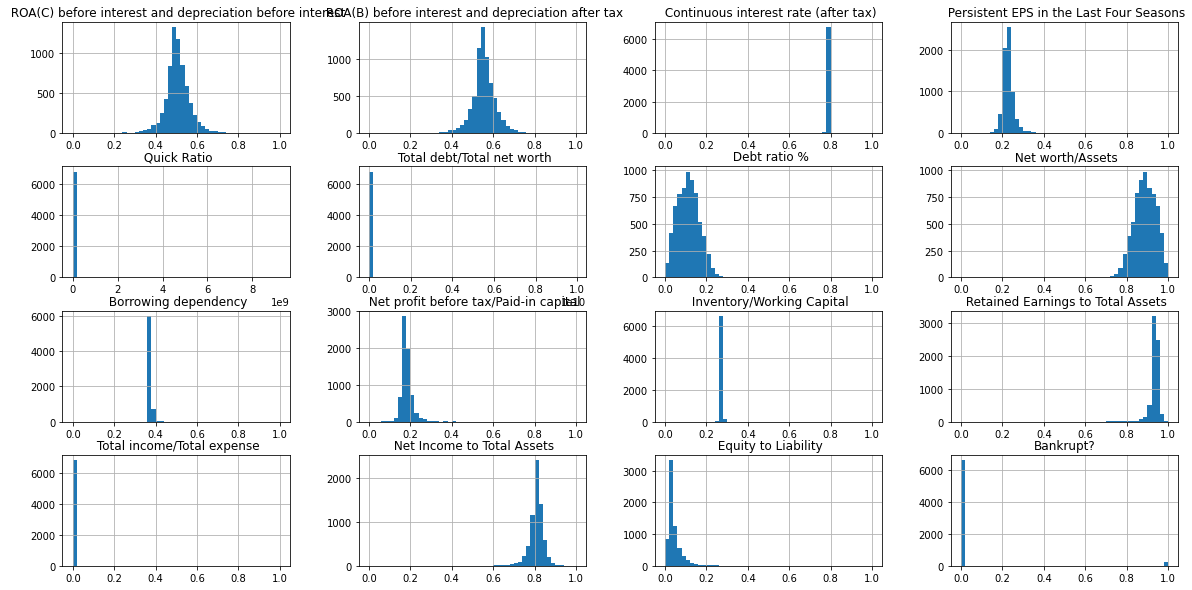

In [ ]:
#Hacemos un histograma para cada columna. Vemos que hay muchas columnas cuyos valores tienenden a un número, tomamos una y la analizamos en específico. Primero vamos a entender mejor cómo funciona la columna Bankrupt? ya que es la variable objetivo. Luego, haremos un boxplot de Non-industry income and expenditure/revenue, para entender mejor las columnas cuyos datos se agrupan en un solo bin.

df.hist(figsize = (20,10), bins = 50)
plt.show()

## Análisis univariado

In [ ]:
df.columns

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(B) before interest and depreciation after tax',
       ' Continuous interest rate (after tax)',
       ' Persistent EPS in the Last Four Seasons', ' Quick Ratio',
       ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets',
       ' Borrowing dependency', ' Net profit before tax/Paid-in capital',
       ' Inventory/Working Capital', ' Retained Earnings to Total Assets',
       ' Total income/Total expense', ' Net Income to Total Assets',
       ' Equity to Liability', 'Bankrupt?'],
      dtype='object')

Análisis univariado de la variable objetivo:

1.   Elemento de la lista
2.   Elemento de la lista



Los datos respecto a la columna que indica si la empresa está en bancarrota están muy sesgados, ya que sólo un 3.2% de las empresas de la base de datos están en bancarrota.

Bankrupt?
0    6599
1     220
dtype: int64
Empresas en bancarrota 3.2 %


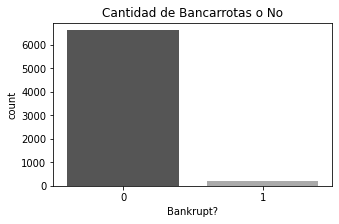

In [ ]:
print(df.groupby('Bankrupt?').size())
print("Empresas en bancarrota %.1f" %(df["Bankrupt?"].value_counts()[1]/len(df)*100), "%")
plt.subplots(figsize = (5,3))
sns.countplot(data=df, x='Bankrupt?', palette='gray')
plt.title('Cantidad de Bancarrotas o No')
plt.show()

Agrupamos en rangos los datos de la variable que tomamos como ejemplo que en los histogramas pareciera tender a un bin. Vemos que los datos tienen un valor entre 0.303 y 0.304, pero que hay muchos datos por fuera de ese rango, significa que a pesar de que tiendan a un número, las columnas se ven muy afectadas por outliers.

In [ ]:
bins = pd.cut(df[' Borrowing dependency'], bins=1000)
bins = pd.DataFrame(bins)
bins.value_counts().head(10)

 Borrowing dependency
(0.369, 0.37]            1548
(0.37, 0.371]             791
(0.371, 0.372]            678
(0.372, 0.373]            601
(0.373, 0.374]            551
(0.374, 0.375]            452
(0.375, 0.376]            382
(0.376, 0.377]            324
(0.377, 0.378]            281
(0.378, 0.379]            218
dtype: int64

In [ ]:
#Para poder trabajar en detalle y ver la diferencia del gráfico con outliers y sin outlieres, verificamos las medidas
#estadísticas de un boxplot
rango_inter = df[" Borrowing dependency"].describe().iloc[6]-df[" Borrowing dependency"].describe().iloc[4]
leve_menor = df[" Borrowing dependency"].describe().iloc[4]-(rango_inter*1.5)
leve_mayor = df[" Borrowing dependency"].describe().iloc[6]+(rango_inter*1.5)
caja = df[(df[" Borrowing dependency"]>leve_menor)&(df[" Borrowing dependency"]<leve_mayor)][" Borrowing dependency"]
print('El rango Intercuartílico es: {}'.format(rango_inter))
print('el leve menor es: {}'.format(leve_menor))
print('El leve mayor es: {}'.format(leve_mayor))

El rango Intercuartílico es: 0.006102893646146024
el leve menor es: 0.36101350308555746
El leve mayor es: 0.38542507767014156


Filas totales: 6819 filas
Filas sin outliers: 6498 filas
Filas con outliers: 321 filas


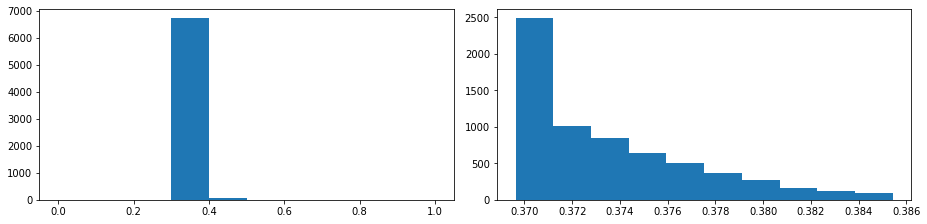

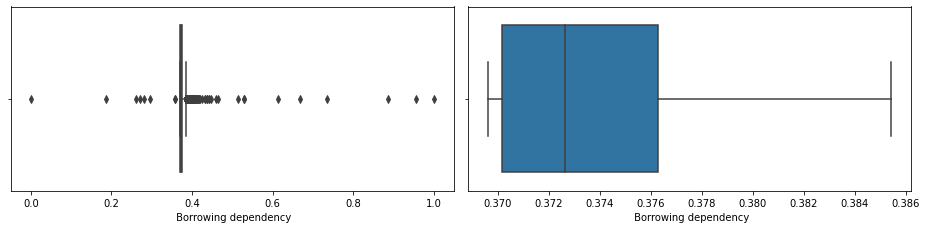

In [ ]:
#Creamos Caja que es el dataframe pero filtrado por la caja del boxplot
#Vemos la cantidad de filas con y sin outliers
print('Filas totales: {} filas'.format(df.shape[0]))
print('Filas sin outliers: {} filas'.format(caja.shape[0]))
print('Filas con outliers: {} filas'.format(df.shape[0]-caja.shape[0]))

#Damos tamaño a los gráficos
plt.subplots(figsize=(13, 6))

#Creamos histograma con outliers, no parece una distribución normal
plt.subplot(2, 2, 1) 
plt.hist(df[' Borrowing dependency'])
plt.subplot(2, 2, 2)
plt.hist(caja)
plt.tight_layout()

#Creamos histograma sin outliers, es una distribución normal
plt.subplots(figsize=(13, 6))
plt.subplot(2, 2, 3) 
boxplot(df[' Borrowing dependency'])
plt.subplot(2, 2, 4)
boxplot(df[' Borrowing dependency'], showfliers=False)
plt.tight_layout()

El rango Intercuartílico es: 0.024108915571524003
el leve menor es: 0.17854779237968998
El leve mayor es: 0.274983454665786
Filas totales: 6819 filas
Filas sin outliers: 6311 filas
Filas con outliers: 508 filas


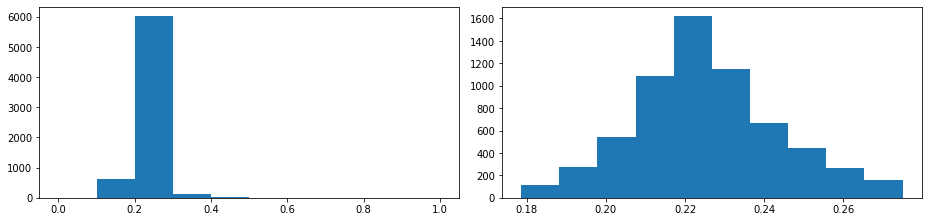

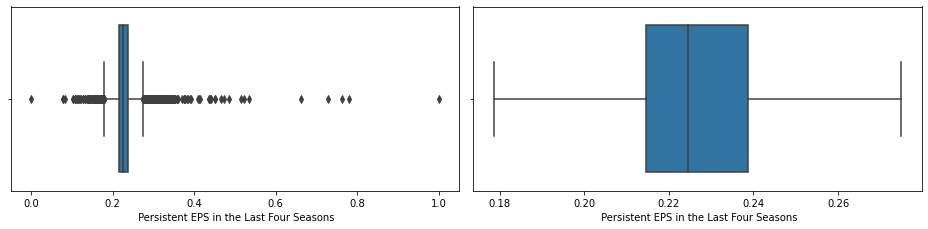

In [ ]:
#Para poder trabajar en detalle y ver la diferencia del gráfico con outliers y sin outlieres, verificamos las medidas
#estadísticas de un boxplot
rango_inter = df[" Persistent EPS in the Last Four Seasons"].describe().iloc[6]-df[" Persistent EPS in the Last Four Seasons"].describe().iloc[4]
leve_menor = df[" Persistent EPS in the Last Four Seasons"].describe().iloc[4]-(rango_inter*1.5)
leve_mayor = df[" Persistent EPS in the Last Four Seasons"].describe().iloc[6]+(rango_inter*1.5)
caja = df[(df[" Persistent EPS in the Last Four Seasons"]>leve_menor)&(df[" Persistent EPS in the Last Four Seasons"]<leve_mayor)][" Persistent EPS in the Last Four Seasons"]
print('El rango Intercuartílico es: {}'.format(rango_inter))
print('el leve menor es: {}'.format(leve_menor))
print('El leve mayor es: {}'.format(leve_mayor))
#Creamos Caja que es el dataframe pero filtrado por la caja del boxplot
#Vemos la cantidad de filas con y sin outliers
print('Filas totales: {} filas'.format(df.shape[0]))
print('Filas sin outliers: {} filas'.format(caja.shape[0]))
print('Filas con outliers: {} filas'.format(df.shape[0]-caja.shape[0]))

#Damos tamaño a los gráficos
plt.subplots(figsize=(13, 6))

#Creamos histograma con outliers, no parece una distribución normal
plt.subplot(2, 2, 1) 
plt.hist(df[' Persistent EPS in the Last Four Seasons'])
plt.subplot(2, 2, 2)
plt.hist(caja)
plt.tight_layout()

#Creamos histograma sin outliers, es una distribución normal
plt.subplots(figsize=(13, 6))
plt.subplot(2, 2, 3) 
boxplot(df[' Persistent EPS in the Last Four Seasons'])
plt.subplot(2, 2, 4)
boxplot(df[' Persistent EPS in the Last Four Seasons'], showfliers=False)
plt.tight_layout()

Todas las columnas cuyo histograma presentaba una linea vertical, al eliminarse los valores atípicos, presentan muchos valores diferentes pero tienden hacia un valor en especifico con muchos decimales.

## Análisis de correlatividades

De la tabla de correlatividades averiguamos la correlatividad máxima y mínima respecto a la variable objetivo

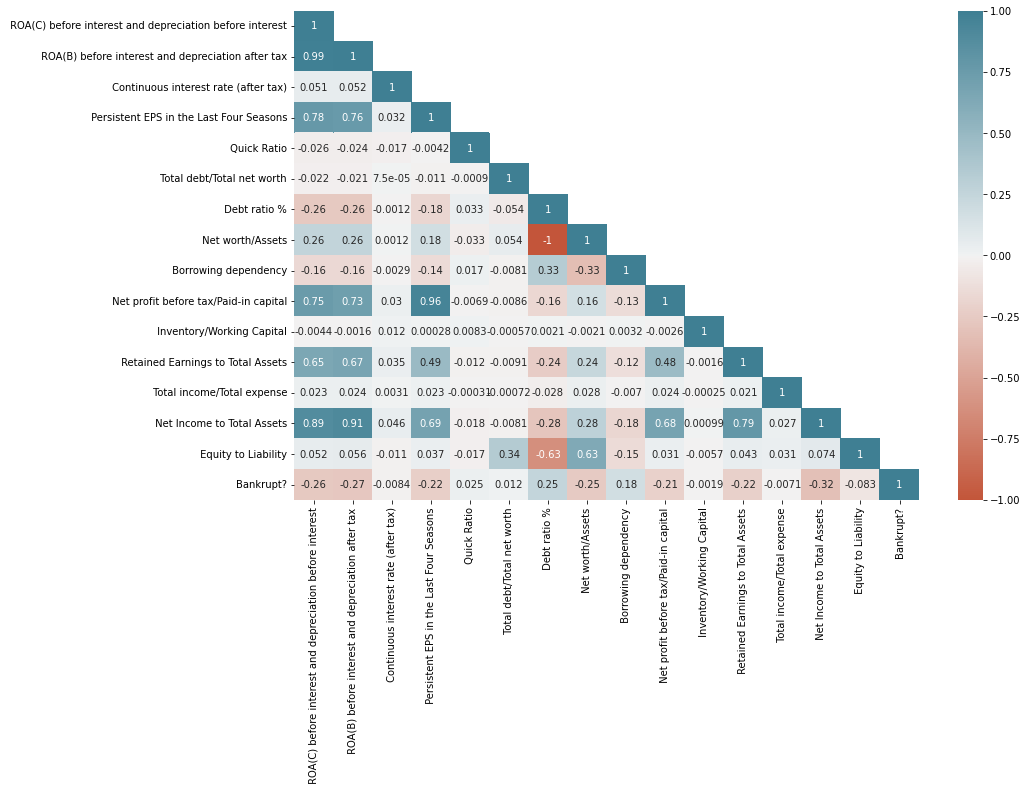

In [ ]:
tri = df.corr().where(np.tril(np.ones(df.corr().shape)).astype(np.bool)[0:16,0:16])

fig, ax = plt.subplots(figsize=(14,9))
sns.heatmap(tri,cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True)

Mediante un heatmap del dataframe vemos que relaciones de correlación más alta son:

Persistent EPS in the Last Four Seasons - Net Value Per Share (A) / 0.78

Net profit before tax/Paid-in capital - persistent EPS in The Last Four Seasons/ 0.96

Net Income to Total Assets - Retained Earnings to Total Assets  / 0.79

Net Income to Total Assets - Net Profit before tax/paid-in Capital / 0.68

In [ ]:
corr_bankrupt = df.corr()[df.corr()["Bankrupt?"]!=1]["Bankrupt?"]

min = corr_bankrupt.min()
max = corr_bankrupt.max()

print("-"*120)
print("")
print("La mayor correlatividad:", corr_bankrupt.loc[corr_bankrupt == max])
print("La menor correlatividad es de: ", corr_bankrupt.loc[corr_bankrupt == min])
print("")
print("-"*120)
print("")
print(corr_bankrupt.to_list)

------------------------------------------------------------------------------------------------------------------------

La mayor correlatividad:  Debt ratio %    0.250161
Name: Bankrupt?, dtype: float64
La menor correlatividad es de:   Net Income to Total Assets   -0.315457
Name: Bankrupt?, dtype: float64

------------------------------------------------------------------------------------------------------------------------

<bound method IndexOpsMixin.tolist of  ROA(C) before interest and depreciation before interest   -0.260807
 ROA(B) before interest and depreciation after tax         -0.273051
 Continuous interest rate (after tax)                      -0.008395
 Persistent EPS in the Last Four Seasons                   -0.219560
 Quick Ratio                                                0.025058
 Total debt/Total net worth                                 0.012314
 Debt ratio %                                               0.250161
 Net worth/Assets                              

Analizamos gráficamente los atributos que tienen la maxima y la minima correlactividad mediante boxplots e histogramas con y sin outliers.

##Análisis bivariado

In [ ]:
df.columns

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(B) before interest and depreciation after tax',
       ' Continuous interest rate (after tax)',
       ' Persistent EPS in the Last Four Seasons', ' Quick Ratio',
       ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets',
       ' Borrowing dependency', ' Net profit before tax/Paid-in capital',
       ' Inventory/Working Capital', ' Retained Earnings to Total Assets',
       ' Total income/Total expense', ' Net Income to Total Assets',
       ' Equity to Liability', 'Bankrupt?'],
      dtype='object')

Analizamos de a dos atributos, las variables que anteriormente consideramos por su interesante correlatividad.


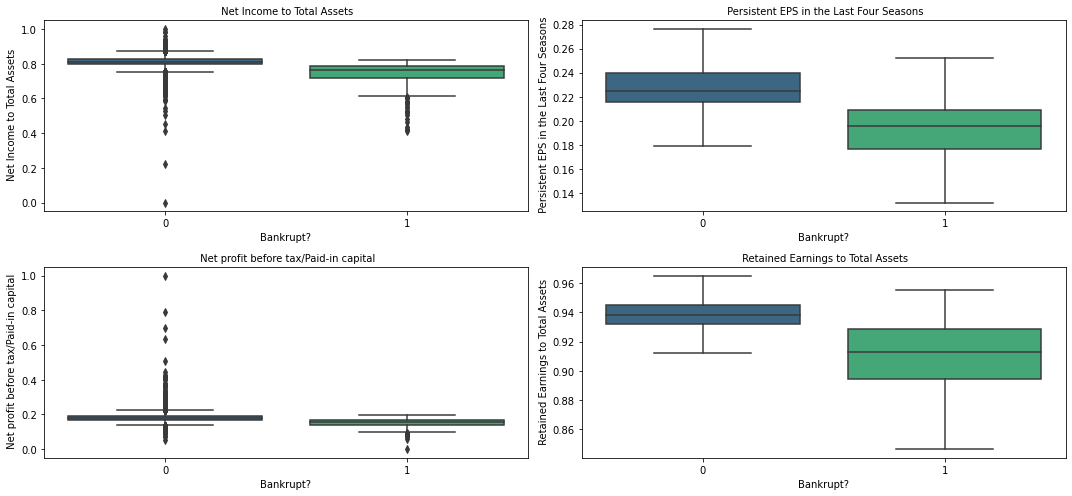

In [ ]:
plt.subplots(figsize=(15, 7))

plt.subplot(2, 2, 1)
sns.boxplot(df['Bankrupt?'], df[' Net Income to Total Assets'], palette = 'viridis')
plt.title(' Net Income to Total Assets', fontsize = 10)

plt.subplot(2, 2, 2)
sns.boxplot(df['Bankrupt?'], df[' Persistent EPS in the Last Four Seasons'], palette = 'viridis', showfliers = False)
plt.title(' Persistent EPS in the Last Four Seasons', fontsize = 10)

plt.subplot(2, 2, 3)
sns.boxplot(df['Bankrupt?'], df[' Net profit before tax/Paid-in capital'], palette = 'viridis')
plt.title(' Net profit before tax/Paid-in capital', fontsize = 10)

plt.subplot(2, 2, 4)
sns.boxplot(df['Bankrupt?'], df[' Retained Earnings to Total Assets'], palette = 'viridis', showfliers = False)
plt.title(' Retained Earnings to Total Assets', fontsize = 10)
plt.tight_layout()

Las empresas con mayor dependencia de los préstamos, tienen mayor probabilidad de caer en bancarrota, aunque hay algunas empresas muy aisladas que tienen mucha dependencia de las deudas pero no están en bancarrota. Las empresas con menor capital de trabajo/patrimonio , tienen mayor probabilidad de caer en bancarrota.

#Análisis Multivariado

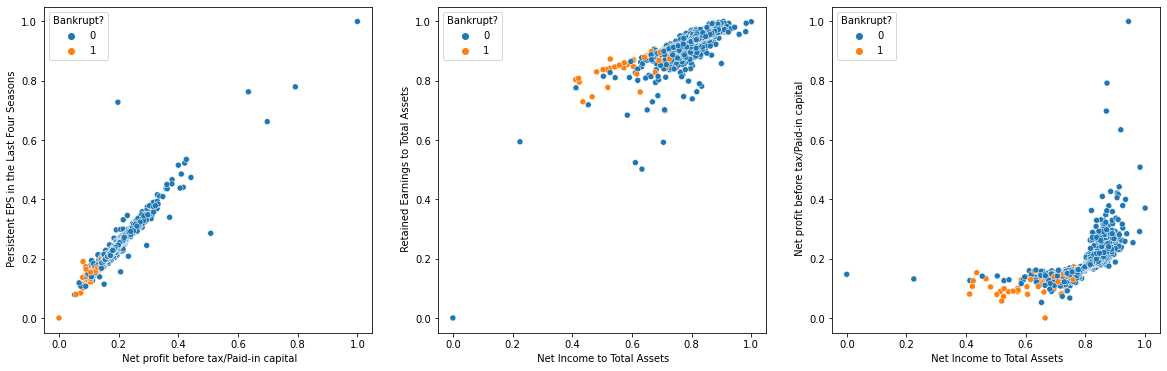

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(20, 6))
sns.scatterplot(data=df, x=' Net profit before tax/Paid-in capital', y=' Persistent EPS in the Last Four Seasons', hue='Bankrupt?', ax=ax[0])
sns.scatterplot(data=df, x=' Net Income to Total Assets', y=' Retained Earnings to Total Assets', hue='Bankrupt?', ax=ax[1])
sns.scatterplot(data=df, x=" Net Income to Total Assets", y=' Net profit before tax/Paid-in capital', hue='Bankrupt?', ax=ax[2])

Cuando las ganancias persistentes por acción en los últimos cuatro trimestres, los valores netos por accion y las ganancias sobre capital desembolsado son bajos, las empresas tienden a caer en bancarrota.

Por otro lado, la dependencia de préstamos se distribuye por todo el rango. Sin embargo, podemos concluir que las empresas cuyos porcentajes de ingresos a patrimonio y de dependencia de préstamos tienden a 0.8 y 0.9 respectivamente, por lo tanto, tienden a NO estar en bancarrota.

#Preparación de datos de entrenamiento y testeo

Optamos por utilizar **Stratified K-fold** para dividir los datos de entrenamiento y testeo ya que nuestra variable target consiste en 0/1 (No/Si, esta en bancarota) y nuestros datos estan muy sesgados o desbalanceados por una mayoria del 97% de 0 (No Bancarota). Con esta técnica lo que intentamos hacer un splitting de datos que tome en cuenta mucho más a la clase minoritaria, para ello  luego aplicaremos una técnica llamada  SMOTE: "Synthetic Minority Oversampling Technique" en la cual se generan muestras sintéticas a partir de los datos para la clase minoritaria. Este algoritmo ayuda a resolver el problema de sobreajuste planteado por el sobremuestreo aleatorio de la clase mayoritaria, balanceando así de alguna manera el muestreo.

In [ ]:
sss = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
skfold_params= {'n_estimators':[10, 30, 100, 300], "max_depth": [3, None],
          "max_features": [1, 5, 10], "min_samples_leaf": [1, 10, 25, 50], "criterion": ["gini", "entropy"]}

for train_index, test_index in sss.split(X_raw,y_raw):
    
    print("Train:", train_index, "Test:", test_index)
    X_train_sm, X_val_sm = X_raw.iloc[train_index], X_raw.iloc[test_index]
    y_train_sm, y_val_sm = y_raw.iloc[train_index], y_raw.iloc[test_index]


# los valores los  convertimos en arrays
X_train_sm = X_train_sm.values
X_val_sm = X_val_sm.values
y_train_sm = y_train_sm.values
y_val_sm = y_val_sm.values


# vemos si los datos de entrenamiento y de prueba estan distribuidos de manera similar
train_unique_label, train_counts_label = np.unique(y_train_sm, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_val_sm, return_counts=True)
print('-' * 84)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train_sm))
print(test_counts_label/ len(y_val_sm))

Train: [   1    2    4 ... 4769 4770 4772] Test: [   0    3    7    8   11   15   27   32   43   47   53   55   60   62
   67   82   85   87   91   96   99  107  110  116  121  129  149  155
  157  161  163  164  174  184  185  187  189  192  195  196  197  212
  215  216  223  226  227  230  231  239  254  255  261  271  273  276
  278  283  290  292  295  296  298  303  307  311  313  316  319  325
  328  329  336  337  339  342  348  357  371  373  377  379  389  390
  405  415  419  424  426  428  429  430  432  438  458  459  461  462
  463  465  475  476  477  480  482  483  494  499  504  510  513  515
  516  523  526  545  550  551  553  555  563  565  572  575  579  581
  585  586  590  593  612  615  617  624  629  637  644  648  650  654
  662  667  669  678  680  681  682  686  688  695  697  701  712  713
  715  716  719  721  725  726  727  728  734  736  738  744  747  753
  755  760  768  772  776  778  781  799  806  813  817  818  819  829
  831  834  838  840  842  8

#RANDOM FOREST Con Optimización GRIDSEARCHCV

In [ ]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators':[10, 30, 100, 300], "max_depth": [3, None], "max_features": [1, 5, 10], "min_samples_leaf": [1, 10, 25, 50], "criterion": ["gini", "entropy"]}

rfc = RandomForestClassifier(class_weight='balanced')

clf = GridSearchCV(rfc, param_grid=param_grid, cv=sss)
# .fit(X_raw, y_raw)

accuracy_grid = [] 
precision_grid = [] 
recall_grid = [] 
f1_grid = [] 
auc_grid = []

for train, val in sss.split(X_train_sm, y_train_sm): 
    pipeline_grid = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), clf) # SMOTE ocurre durante el Cross Validation, no antes 
    model_grid = pipeline_grid.fit(X_train_sm[train], y_train_sm[train]) 
    best_est_grid = clf.best_estimator_ 
    prediction_grid = best_est_grid.predict(X_train_sm[val])

    accuracy_grid.append(pipeline_grid.score(X_train_sm[val], y_train_sm[val]))
    precision_grid.append(precision_score(y_train_sm[val], prediction_grid))
    recall_grid.append(recall_score(y_train_sm[val], prediction_grid))
    f1_grid.append(f1_score(y_train_sm[val], prediction_grid))
    auc_grid.append(roc_auc_score(y_train_sm[val], prediction_grid))

print('---' * 45) 
print('')
print('GridSearchCV con RFC y Strat-KFold (SMOTE) resultados:') 
print('') 
print("accuracy: {}".format(np.mean(accuracy_grid))) 
print("precision: {}".format(np.mean(precision_grid))) 
print("recall: {}".format(np.mean(recall_grid))) 
print("f1: {}".format(np.mean(f1_grid))) 
print('') 
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------

GridSearchCV con RFC y Strat-KFold (SMOTE) resultados:

accuracy: 0.9549618137278447
precision: 0.3349616576846712
recall: 0.4206666666666667
f1: 0.37123881923217256

---------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
pred_gridsearch= best_est_grid.predict(X_val_sm)

In [ ]:
print(pred_gridsearch)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
#Obtenemos las probabilidades de la predicción
prob_pred_gridSearch = best_est_grid.predict_proba(X_val_sm)
print(prob_pred_gridSearch)

[[0.43333333 0.56666667]
 [1.         0.        ]
 [0.96666667 0.03333333]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]]


In [ ]:
#Imprimimos el reporte de Predicciones con GridSearchCV
label = ['Fin.Estable', 'Fin.Inestable']
smote_prediction_grd = best_est_grid.predict(X_val_sm)
print(classification_report(y_val_sm, smote_prediction_grd, target_names=label))

               precision    recall  f1-score   support

  Fin.Estable       0.98      0.97      0.97       923
Fin.Inestable       0.29      0.35      0.32        31

     accuracy                           0.95       954
    macro avg       0.63      0.66      0.65       954
 weighted avg       0.96      0.95      0.95       954



[[896  27]
 [ 20  11]]


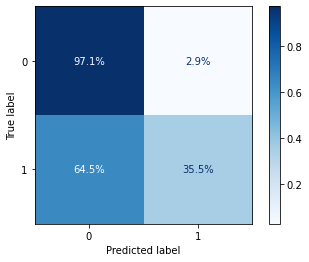

In [ ]:

#Matriz de Confusión
print(confusion_matrix(y_val_sm, pred_gridsearch))

#Ploteamos la Matriz
plot_confusion_matrix(clf, X_val_sm, y_val_sm,cmap='Blues', normalize='true', values_format='.1%')

plt.show()

#Arbol de Decisión

In [ ]:
#Analizamos la composición del target en los datos, los datos quedan muy bien proporcionados respecto al origen
print(f'Proporción de la variable objetivo en el dataset original:\n{df["Bankrupt?"].value_counts() / len(df)}\n\n'+
      f'Proporción de la variable objetivo en el dataset de entrenamiento:\n{y_raw.value_counts() / len(y_raw)}\n\n'+
      f'Proporción de la variable objetivo en el dataset de prueba:\n{y_test.value_counts() / len(y_test)}')

Proporción de la variable objetivo en el dataset original:
0    0.967737
1    0.032263
Name: Bankrupt?, dtype: float64

Proporción de la variable objetivo en el dataset de entrenamiento:
0    0.967735
1    0.032265
Name: Bankrupt?, dtype: float64

Proporción de la variable objetivo en el dataset de prueba:
0    0.967742
1    0.032258
Name: Bankrupt?, dtype: float64


In [ ]:
from sklearn.tree import DecisionTreeClassifier 
#Definimos e importamos el modelo
tree = DecisionTreeClassifier() #Creamos el modelo
tree_params = {"max_depth": [3, None],
                            
              "criterion": ["gini", "entropy"]
               }


tree   #'max_dept':['2'],
tree.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier()

In [ ]:
accuracy_dst = [] 
precision_dst = [] 
recall_dst = [] 
f1_dst = [] 
auc_dst = []
#Entrenamos el modelo
# define evaluation procedure
# evaluate model
rand_dst = RandomizedSearchCV(tree, tree_params , cv=sss, n_iter=4)
# entrenamos el modelo
tree.fit(X_train_sm,y_train_sm)

for train, val in sss.split(X_train_sm, y_train_sm):
    pipeline_dst = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_dst) # SMOTE ocurre durante el Cross Validation, no antes
    model_dst = pipeline_dst.fit(X_train_sm[train], y_train_sm[train])
    best_est_dst = rand_dst.best_estimator_
    prediction_dst = best_est_dst.predict(X_train_sm[val])

    # entrenamos el modelo
    rand_dst.fit(X_train_sm,y_train_sm)

    accuracy_dst.append(pipeline_dst.score(X_train_sm[val], y_train_sm[val]))
    precision_dst.append(precision_score(y_train_sm[val], prediction_dst))
    recall_dst.append(recall_score(y_train_sm[val], prediction_dst))
    f1_dst.append(f1_score(y_train_sm[val], prediction_dst))
    auc_dst.append(roc_auc_score(y_train_sm[val], prediction_dst))


print('---' * 45)
print('')
print('Decision Tree (SMOTE) resultados:')
print('')
print("accuracy: {}".format(np.mean(accuracy_dst)))
print("precision: {}".format(np.mean(precision_dst)))
print("recall: {}".format(np.mean(recall_dst)))
print("f1: {}".format(np.mean(f1_dst)))
print('')
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------

Decision Tree (SMOTE) resultados:

accuracy: 0.9735540337466464
precision: 0.23195229034357215
recall: 0.471
f1: 0.3088378745025318

---------------------------------------------------------------------------------------------------------------------------------------


[Text(0.3630850968436155, 0.9642857142857143, " Net Income to Stockholder's Equity <= 0.607\ngini = 0.062\nsamples = 3819\nvalue = [3696, 123]"),
 Text(0.1449067431850789, 0.8928571428571429, ' Quick Ratio <= 0.005\ngini = 0.469\nsamples = 136\nvalue = [85, 51]'),
 Text(0.06599713055954089, 0.8214285714285714, ' Total assets to GNP price <= 0.0\ngini = 0.5\nsamples = 86\nvalue = [42, 44]'),
 Text(0.02295552367288379, 0.75, ' Regular Net Profit Growth Rate <= 0.521\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.011477761836441894, 0.6785714285714286, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.03443328550932568, 0.6785714285714286, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.10903873744619799, 0.75, ' Cash Flow to Equity <= 0.274\ngini = 0.484\nsamples = 73\nvalue = [30, 43]'),
 Text(0.05738880918220947, 0.6785714285714286, ' Net profit before tax/Paid-in capital <= 0.132\ngini = 0.38\nsamples = 47\nvalue = [12, 35]'),
 Text(0.02295552367288379, 0.607142857142

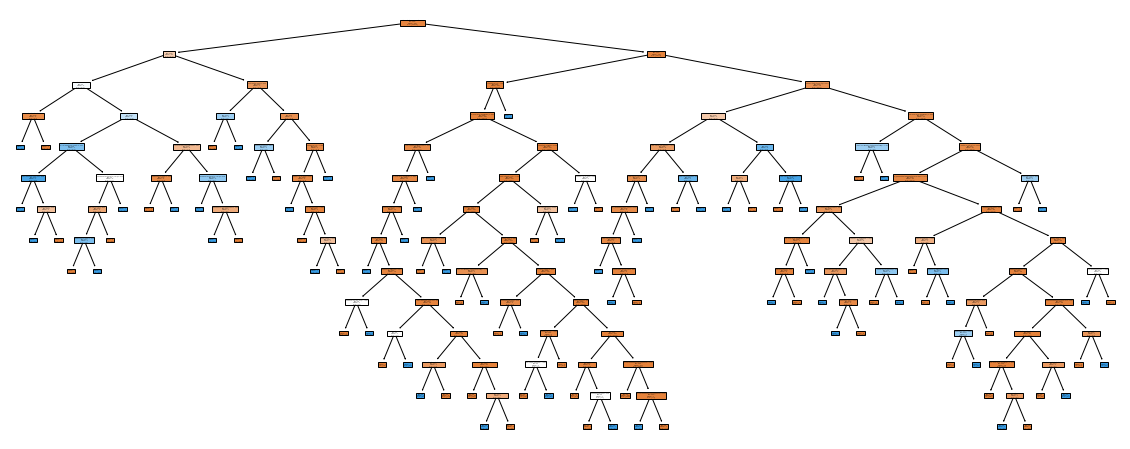

In [ ]:
#importamos el gráfico del árbol de decisión
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 8))
plot_tree(decision_tree=tree, feature_names=data_norm.columns, filled = True)

In [ ]:
#tomamos muestra aleatoria de X
muestra = new_df.sample()
muestra

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
1121,0.451519,0.418535,0.407266,0.46973,0.46973,0.692636,0.586232,0.592852,0.264809,0.577363,...,0.580117,0.085051,0.484919,0.469728,0.609466,0.244398,0.026016,0.44574,1,0.053372


In [ ]:
#dividimos la cantidad de empresas en bancarrota contra
#el total de empresas que cumplen con los atributos siguiendo el árbol de decisión
#hay un 6.57% de probabilidad de que la empresa muestra esté en bancarrota
247/3700

0.06675675675675675

In [ ]:
#calculamos la probabilidad de que no esté o esté en bancarota
tree.predict_proba(muestra)

array([[1., 0.]])

In [ ]:
y_train_pred = tree.predict(X_raw) #Prediccion en Train
y_test_pred = tree.predict(X_test)  #Prediccion en Test

In [ ]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
precision_entrenamiento = accuracy_score(y_raw , y_train_pred)

#Calculo el accuracy en Test
precision_prueba = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', precision_entrenamiento)
print('% de aciertos sobre el set de prueba:', precision_prueba)

% de aciertos sobre el set de entrenamiento: 0.9903624554787346
% de aciertos sobre el set de prueba: 0.956989247311828


El rango Intercuartílico es: 0.029704680347701018
el leve menor es: 0.752192828671619
El leve mayor es: 0.871011550062423
Filas totales: 6819 filas
Filas sin outliers: 6258 filas
Filas con outliers: 561 filas


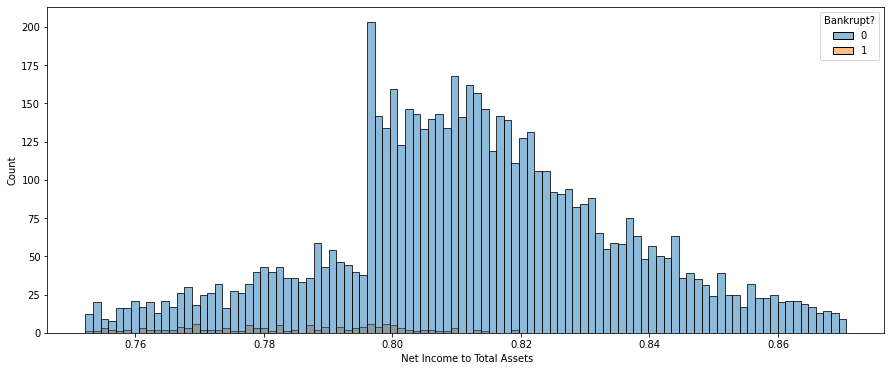

In [ ]:
#interpretamos el modelo de árbol de decisiones en un histograma, vemos que las empresas cuyo
#porcentaje de ingresos netos a capital es menor a 84.85%, la empresa tiene mayor probabilidad de caer en bancarrota
rango_inter = df[" Net Income to Total Assets"].describe().iloc[6]-df[" Net Income to Total Assets"].describe().iloc[4]
leve_menor = df[" Net Income to Total Assets"].describe().iloc[4]-(rango_inter*1.5)
leve_mayor = df[" Net Income to Total Assets"].describe().iloc[6]+(rango_inter*1.5)
caja = df[(df[" Net Income to Total Assets"]>leve_menor)&(df[" Net Income to Total Assets"]<leve_mayor)][" Net Income to Total Assets"]
print('El rango Intercuartílico es: {}'.format(rango_inter))
print('el leve menor es: {}'.format(leve_menor))
print('El leve mayor es: {}'.format(leve_mayor))

print('Filas totales: {} filas'.format(df.shape[0]))
print('Filas sin outliers: {} filas'.format(caja.shape[0]))
print('Filas con outliers: {} filas'.format(df.shape[0]-caja.shape[0]))

plt.figure(figsize=(15, 6))
sns.histplot(x=caja, hue=df["Bankrupt?"], bins = 100)

In [ ]:
#creamos las predicciones en X
y_pred = tree.predict(new_df)

In [ ]:
#creamos df de la columna predicha
df["pred"] = y_pred

In [ ]:
#ver los aciertos en números
porcentaje_aciertos = (df["Bankrupt?"] == df["pred"]).sum()/6819
print("Nuestro modelo es bueno en un", porcentaje_aciertos, "%")

Nuestro modelo es bueno en un 0.9803490247836926 %


In [ ]:
(df["Bankrupt?"] == df["pred"]).sum()

6685

In [ ]:
df.sample(20)[["Bankrupt?", "pred"]]

,Bankrupt?,pred
2374,0,0
4038,0,0
3323,0,0
4264,1,0
3353,0,0
2677,0,0
2611,0,0
3350,0,0
4439,0,0
3679,0,0


In [ ]:
#Imprimimos el reporte de Predicciones con DECISION TREE
label = ['Fin.Estable', 'Fin.Inestable']
smote_prediction_dst = tree.predict(X_val_sm)
print(classification_report(y_val_sm, smote_prediction_dst, target_names=label))

               precision    recall  f1-score   support

  Fin.Estable       0.98      0.97      0.98       923
Fin.Inestable       0.27      0.29      0.28        31

     accuracy                           0.95       954
    macro avg       0.62      0.63      0.63       954
 weighted avg       0.95      0.95      0.95       954



[[898  25]
 [ 20  11]]


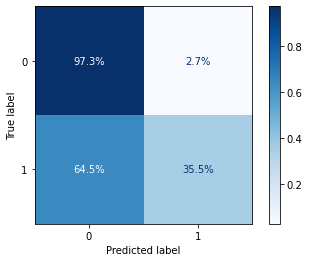

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#Calculamos las predicciones
predictions = tree.predict(X_val_sm)

#Matriz de Confusión
print(confusion_matrix(y_val_sm, predictions))

#Ploteamos la Matriz de confusión
plot_confusion_matrix(tree, X_val_sm, y_val_sm, cmap='Blues', normalize='true', values_format='.1%')
plt.show()

# Random Forest con Optimizador Randomized Search CV

In [ ]:
accuracy_lst_rfc = []
precision_lst_rfc = []
recall_lst_rfc = []
f1_lst_rfc = []
auc_lst_rfc = []

rfc_sm = RandomForestClassifier()
#rfc_params = {}
rfc_params = {'max_features' : ['auto', 'sqrt', 'log2'],
              'random_state' : [42],
              'class_weight' : ['balanced','balanced_subsample'],
              'criterion' : ['gini', 'entropy'],
              'bootstrap' : [True,False]}
    
    
rand_rfc = RandomizedSearchCV(rfc_sm, rfc_params, n_iter=4)


for train, val in sss.split(X_train_sm, y_train_sm):
    pipeline_rfc = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_rfc) # SMOTE ocurre durante el Cross Validation, no antes
    model_rfc = pipeline_rfc.fit(X_train_sm, y_train_sm)
    best_est_rfc = rand_rfc.best_estimator_
    prediction_rfc = best_est_rfc.predict(X_train_sm[val])
    
    accuracy_lst_rfc.append(pipeline_rfc.score(X_train_sm[val], y_train_sm[val]))
    precision_lst_rfc.append(precision_score(y_train_sm[val], prediction_rfc))
    recall_lst_rfc.append(recall_score(y_train_sm[val], prediction_rfc))
    f1_lst_rfc.append(f1_score(y_train_sm[val], prediction_rfc))
    auc_lst_rfc.append(roc_auc_score(y_train_sm[val], prediction_rfc))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst_rfc)))
print("precision: {}".format(np.mean(precision_lst_rfc)))
print("recall: {}".format(np.mean(recall_lst_rfc)))
print("f1: {}".format(np.mean(f1_lst_rfc)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 1.0
precision: 1.0
recall: 1.0
f1: 1.0
---------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
# Imprimimos el reporte de Predicciones con RANDOM FOREST
label = ['Fin.Estable', 'Fin.Inestable']

smote_prediction_rfc = best_est_rfc.predict(X_val_sm)
print(classification_report(y_val_sm, smote_prediction_rfc, target_names=label))

               precision    recall  f1-score   support

  Fin.Estable       0.98      0.97      0.97       923
Fin.Inestable       0.30      0.35      0.32        31

     accuracy                           0.95       954
    macro avg       0.64      0.66      0.65       954
 weighted avg       0.96      0.95      0.95       954



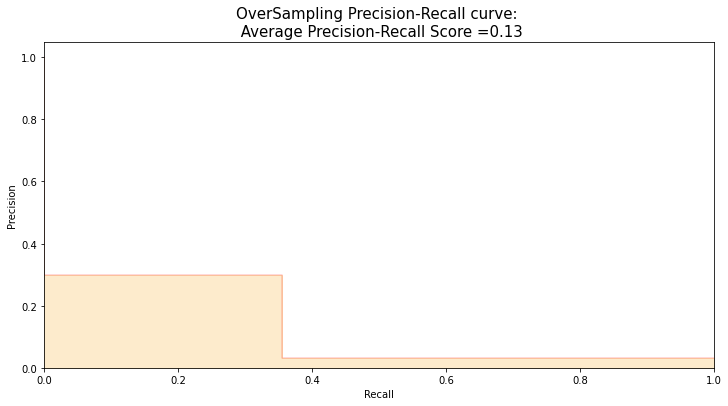

In [ ]:
# Graficamos la  curva de Precision-Recall PARA RANDOM FOREST

y_score_rfc = best_est_rfc.predict(X_val_sm)

average_precision_rfc = average_precision_score(y_val_sm, y_score_rfc)

fig = plt.figure(figsize=(12,6))

precision_rfc, recall_rfc, _ = precision_recall_curve(y_val_sm, y_score_rfc)

plt.step(recall_rfc, precision_rfc, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall_rfc, precision_rfc, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision_rfc), fontsize=15)

plt.show()

[[897  26]
 [ 19  12]]


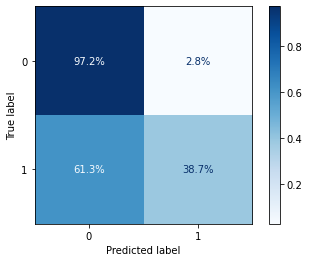

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
#Matriz de Confusión
print(confusion_matrix(y_val_sm, smote_prediction_rfc))

#Ploteamos la Matriz
plot_confusion_matrix(rand_rfc, X_val_sm, y_val_sm,cmap='Blues', normalize='true', values_format='.1%')

plt.show()

# XGBoost

In [ ]:
#Hacemos las listas para promediar scores
accuracy_lst_xgb = []
precision_lst_xgb = []
recall_lst_xgb = []
f1_lst_xgb = []
auc_lst_xgb = []

xgb_sm = xgb.XGBClassifier(random_state = 42)
xgb_params = {'eta' : [0.1,0.01,0.001],  # Learning rate
              'eval_metric': ['logloss'],
              'max_depth' : [3,6,9],
              'lambda' : [1,1.5,2],      #  regularización  L2 (valores altos producen un modelo más conservativo)
              'alpha' : [0,0.5,1]}        #  regularización L1 (valores altos producen un modelo más conservativo)
              #'reg' : ['squarederror']}
              #'random_state': [42]}
        
rand_xgb = RandomizedSearchCV(xgb_sm, xgb_params, n_iter=4)


for train, val in sss.split(X_train_sm, y_train_sm):
    pipeline_xgb = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_xgb) # SMOTE ocurre durante el Cross Validation, no antes
    model_xgb = pipeline_xgb.fit(X_train_sm, y_train_sm)
    best_est_xgb = rand_xgb.best_estimator_
    prediction_xgb = best_est_xgb.predict(X_train_sm[val])
    
    accuracy_lst_xgb.append(pipeline_xgb.score(X_train_sm[val], y_train_sm[val]))
    precision_lst_xgb.append(precision_score(y_train_sm[val], prediction_xgb))
    recall_lst_xgb.append(recall_score(y_train_sm[val], prediction_xgb))
    f1_lst_xgb.append(f1_score(y_train_sm[val], prediction_xgb))
    auc_lst_xgb.append(roc_auc_score(y_train_sm[val], prediction_xgb))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst_xgb)))
print("precision: {}".format(np.mean(precision_lst_xgb)))
print("recall: {}".format(np.mean(recall_lst_xgb)))
print("f1: {}".format(np.mean(f1_lst_xgb)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 1.0
precision: 1.0
recall: 1.0
f1: 1.0
---------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
# reporte de Casificación para XGBOOST
label = ['Fin.Estable', 'Fin.Inestable']
smote_prediction_xgb = best_est_xgb.predict(X_val_sm)
print(classification_report(y_val_sm, smote_prediction_xgb, target_names=label))

               precision    recall  f1-score   support

  Fin.Estable       0.98      0.96      0.97       923
Fin.Inestable       0.28      0.42      0.33        31

     accuracy                           0.95       954
    macro avg       0.63      0.69      0.65       954
 weighted avg       0.96      0.95      0.95       954



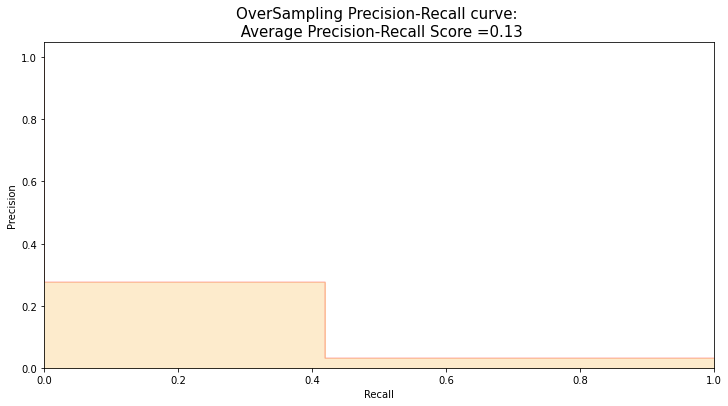

In [ ]:
# Graficamos la curva de Precision-Recall

y_score_xgb = best_est_xgb.predict(X_val_sm)

average_precision_xgb = average_precision_score(y_val_sm, y_score_xgb)

fig = plt.figure(figsize=(12,6))

precision_xgb, recall_xgb, _ = precision_recall_curve(y_val_sm, y_score_xgb)

plt.step(recall_xgb, precision_xgb, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall_xgb, precision_xgb, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision_xgb), fontsize=15)

plt.show()

[[894  29]
 [ 18  13]]


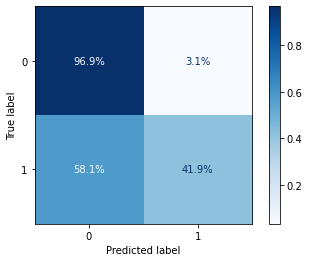

In [ ]:
#Matriz de Confusión
print(confusion_matrix(y_val_sm, smote_prediction_xgb))

#Ploteamos la Matriz
plot_confusion_matrix(rand_xgb, X_val_sm, y_val_sm, cmap='Blues', normalize='true', values_format='.1%')

plt.show()

#CATBoost

In [ ]:
#Hacemos las listas para promediar Score 

accuracy_lst_cat = []
precision_lst_cat = []
recall_lst_cat = []
f1_lst_cat = []
auc_lst_cat = []

cat_sm = CatBoostClassifier(verbose = 0)

cat_params = {'eval_metric': ['F1'],
              'iterations': [100,500,1000],
              'learning_rate' : [0.1,0.01,0.001],
              'random_seed' : [42],
              'auto_class_weights' : ['Balanced','SqrtBalanced']
             }
    
    
rand_cat = RandomizedSearchCV(cat_sm, cat_params, n_iter=4)


for train, val in sss.split(X_train_sm, y_train_sm):
    pipeline_cat = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_cat) # SMOTE ocurre durante el Cross Validation, no antes..
    model_cat = pipeline_cat.fit(X_train_sm, y_train_sm)
    best_est_cat = rand_cat.best_estimator_
    prediction_cat = best_est_cat.predict(X_train_sm[val])
    
    accuracy_lst_cat.append(pipeline_cat.score(X_train_sm[val], y_train_sm[val]))
    precision_lst_cat.append(precision_score(y_train_sm[val], prediction_cat))
    recall_lst_cat.append(recall_score(y_train_sm[val], prediction_cat))
    f1_lst_cat.append(f1_score(y_train_sm[val], prediction_cat))
    auc_lst_cat.append(roc_auc_score(y_train_sm[val], prediction_cat))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst_cat)))
print("precision: {}".format(np.mean(precision_lst_cat)))
print("recall: {}".format(np.mean(recall_lst_cat)))
print("f1: {}".format(np.mean(f1_lst_cat)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9984293193717277
precision: 0.9655172413793103
recall: 0.992
f1: 0.9777777777777779
---------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
#Imprimimos el reporte de Predicciones con CATBOOST
label = ['Fin.Estable', 'Fin.Inestable']
smote_prediction_cat = best_est_cat.predict(X_val_sm)
print(classification_report(y_val_sm, smote_prediction_cat, target_names=label))

               precision    recall  f1-score   support

  Fin.Estable       0.98      0.97      0.98       923
Fin.Inestable       0.33      0.42      0.37        31

     accuracy                           0.95       954
    macro avg       0.66      0.70      0.67       954
 weighted avg       0.96      0.95      0.96       954



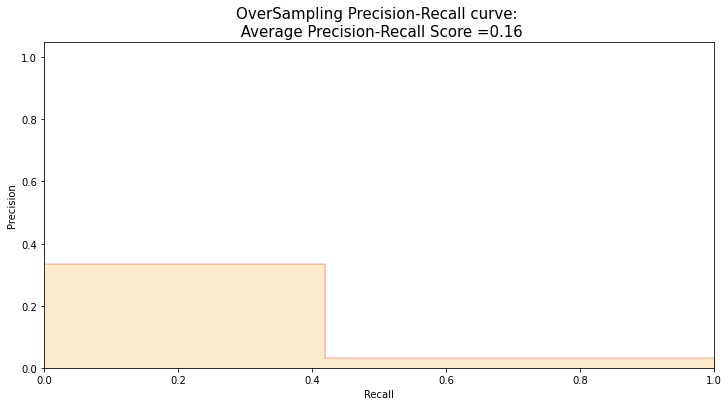

In [ ]:
# Graficamos la Cuva de  Precision-Recall para CATBOOST

smote_prediction_cat = best_est_cat.predict(X_val_sm)

average_precision_cat = average_precision_score(y_val_sm, smote_prediction_cat)

fig = plt.figure(figsize=(12,6))

precision_cat, recall_cat, _ = precision_recall_curve(y_val_sm, smote_prediction_cat)

plt.step(recall_cat, precision_cat, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall_cat, precision_cat, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision_cat), fontsize=15)

plt.show()

[[898  25]
 [ 16  15]]


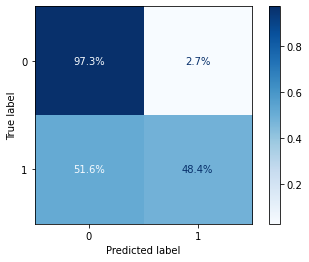

In [ ]:
#Matriz de Confusión
print(confusion_matrix(y_val_sm, smote_prediction_cat))

#Ploteamos la Matriz
plot_confusion_matrix(rand_cat, X_val_sm, y_val_sm, cmap='Blues', normalize='true', values_format='.1%')

plt.show()

#Resultados

Trabajamos con RandomizedSearchCV tanto con GridSearchCV como técnica de optimización de los algoritmos de clasificación, luego se realzó una comparativa de resultados iniciales, lo que nos resulto que con RandomizedSearchCV obtuvimos mejores métricas en términos de minimización de  falsos negativos y falsos positivos además de mejores tiempos de ejecución en las corridas, resultando 11 veces más rápidas en comparación con GridSearchCV, por lo tanto decidimos avanzar con RandomizedSearchCV como técnica de optimización para todos los algoritmos de clasificación evaluados en este estudio.

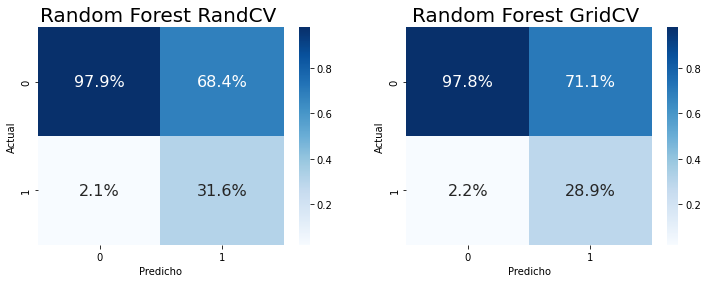

In [ ]:

conf_mx0 = confusion_matrix(y_val_sm,smote_prediction_rfc)
conf_mx1 = confusion_matrix(y_val_sm,smote_prediction_grd)

heat_cm0 = pd.DataFrame(conf_mx0, columns=np.unique(y_val_sm), index = np.unique(y_val_sm))
heat_cm0.index.name = 'Actual'
heat_cm0.columns.name = 'Predicho'

heat_cm1 = pd.DataFrame(conf_mx1, columns=np.unique(y_val_sm), index = np.unique(y_val_sm))
heat_cm1.index.name = 'Actual'
heat_cm1.columns.name = 'Predicho'

f, ax = plt.subplots(1, 2, figsize=(5,4))
f.subplots_adjust(left=None, bottom=None, right= 2, top=None, wspace=None, hspace= None)

sns.heatmap(heat_cm0/np.sum(heat_cm0), cmap="Blues", annot=True, annot_kws={"size": 16},fmt='.1%', ax = ax[0])
ax[0].set_title('Random Forest RandCV ', fontsize = 20)
sns.heatmap(heat_cm1/np.sum(heat_cm1), cmap="Blues", annot=True, annot_kws={"size": 16},fmt='.1%', ax = ax[1])
ax[1].set_title('Random Forest GridCV ', fontsize = 20)
plt.show()




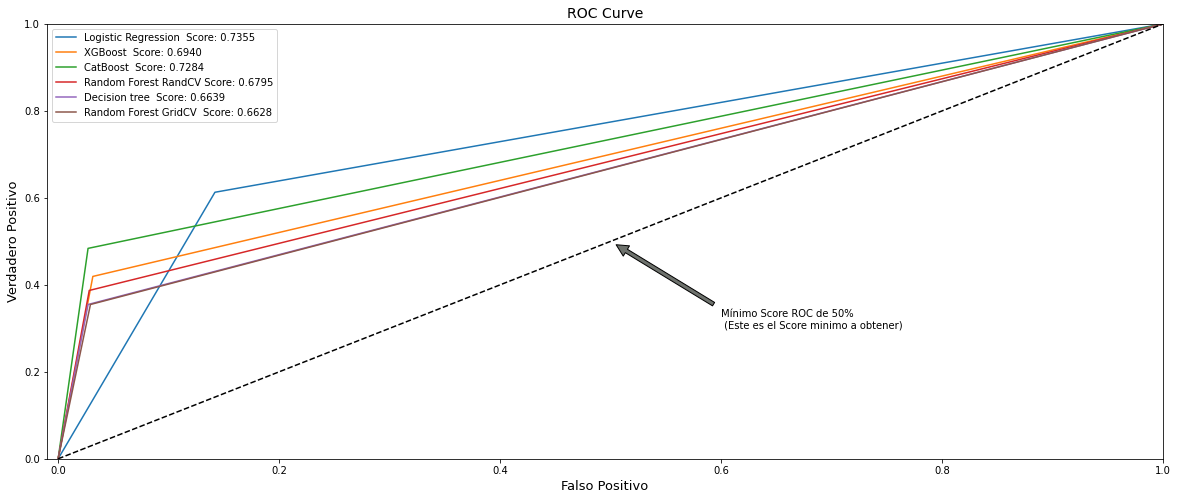

In [ ]:
from sklearn.metrics import roc_curve

log_fpr, log_tpr, log_thresold = roc_curve(y_val_sm, pred_reg_sm)
rfc_fpr, rfc_tpr, rfc_threshold = roc_curve(y_val_sm, smote_prediction_rfc)
xgb_fpr, xgb_tpr, xgb_thresold = roc_curve(y_val_sm, smote_prediction_xgb)
cat_fpr, cat_tpr, cat_thresold = roc_curve(y_val_sm, smote_prediction_cat)
dst_fpr, dst_tpr, dst_thresold = roc_curve(y_val_sm, smote_prediction_dst)
grd_fpr, grd_tpr, grd_thresold = roc_curve(y_val_sm, smote_prediction_grd)

def graph_roc_curve_multiple(log_fpr, log_tpr, rfc_fpr, rfc_tpr,xgb_fpr, xgb_tpr,cat_fpr, cat_tpr, dst_fpr, dst_tpr, grd_fpr, grd_tpr):
    plt.figure(figsize=(20,8))
    plt.title('ROC Curve', fontsize=14)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression  Score: {:.4f}'.format(roc_auc_score(y_val_sm, pred_reg_sm)))
    plt.plot(xgb_fpr, xgb_tpr, label='XGBoost  Score: {:.4f}'.format(roc_auc_score(y_val_sm, smote_prediction_xgb)))
    plt.plot(cat_fpr, cat_tpr, label='CatBoost  Score: {:.4f}'.format(roc_auc_score(y_val_sm, smote_prediction_cat)))
    plt.plot(rfc_fpr, rfc_tpr, label='Random Forest RandCV Score: {:.4f}'.format(roc_auc_score(y_val_sm, smote_prediction_rfc)))
    plt.plot(dst_fpr, dst_tpr, label='Decision tree  Score: {:.4f}'.format(roc_auc_score(y_val_sm, smote_prediction_dst)))
    plt.plot(grd_fpr, grd_tpr, label='Random Forest GridCV  Score: {:.4f}'.format(roc_auc_score(y_val_sm, smote_prediction_grd)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('Falso Positivo', fontsize=13)
    plt.ylabel('Verdadero Positivo', fontsize=13)
    plt.annotate('Mínimo Score ROC de 50% \n (Este es el Score minimo a obtener)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, rfc_fpr, rfc_tpr,xgb_fpr, xgb_tpr,cat_fpr, cat_tpr, dst_fpr, dst_tpr, grd_fpr, grd_tpr)
plt.show()

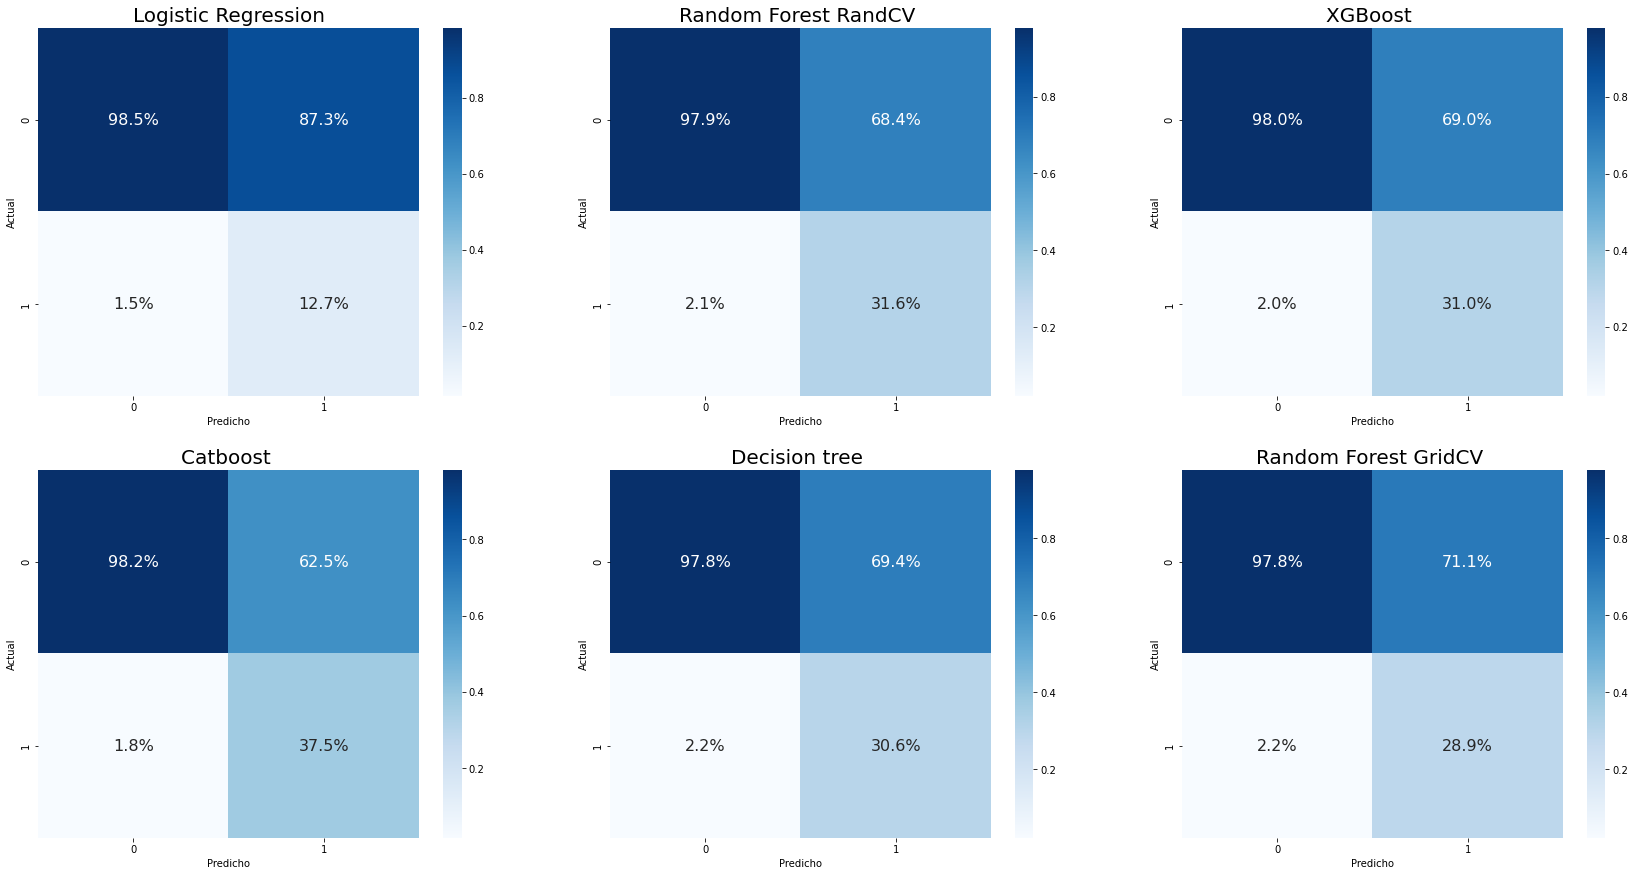

In [ ]:
# Graficamos la matriz de confusión para cada algoritmo clasificador 

conf_mx0 = confusion_matrix(y_val_sm,pred_reg_sm)
conf_mx1 = confusion_matrix(y_val_sm,smote_prediction_rfc)
conf_mx2 = confusion_matrix(y_val_sm,smote_prediction_xgb)
conf_mx3 = confusion_matrix(y_val_sm,smote_prediction_cat)
conf_mx4 = confusion_matrix(y_val_sm,smote_prediction_dst)
conf_mx5 = confusion_matrix(y_val_sm,smote_prediction_grd)

heat_cm0 = pd.DataFrame(conf_mx0, columns=np.unique(y_val_sm), index = np.unique(y_val_sm))
heat_cm0.index.name = 'Actual'
heat_cm0.columns.name = 'Predicho'

heat_cm1 = pd.DataFrame(conf_mx1, columns=np.unique(y_val_sm), index = np.unique(y_val_sm))
heat_cm1.index.name = 'Actual'
heat_cm1.columns.name = 'Predicho'

heat_cm2 = pd.DataFrame(conf_mx2, columns=np.unique(y_val_sm), index = np.unique(y_val_sm))
heat_cm2.index.name = 'Actual'
heat_cm2.columns.name = 'Predicho'

heat_cm3 = pd.DataFrame(conf_mx3, columns=np.unique(y_val_sm), index = np.unique(y_val_sm))
heat_cm3.index.name = 'Actual'
heat_cm3.columns.name = 'Predicho'

heat_cm4 = pd.DataFrame(conf_mx4, columns=np.unique(y_val_sm), index = np.unique(y_val_sm))
heat_cm4.index.name = 'Actual'
heat_cm4.columns.name = 'Predicho'

heat_cm5 = pd.DataFrame(conf_mx5, columns=np.unique(y_val_sm), index = np.unique(y_val_sm))
heat_cm5.index.name = 'Actual'
heat_cm5.columns.name = 'Predicho'


f, axes = plt.subplots(2, 3, figsize=(12,6)) 
f.subplots_adjust(left=None, bottom=None, right= 2, top=2, wspace=None, hspace= None)

sns.heatmap(heat_cm0/np.sum(heat_cm0), cmap="Blues", annot=True, annot_kws={"size": 16},fmt='.1%', ax = axes[0,0])
axes[0,0].set_title('Logistic Regression', fontsize = 20)
sns.heatmap(heat_cm1/np.sum(heat_cm1), cmap="Blues", annot=True, annot_kws={"size": 16},fmt='.1%', ax = axes[0,1])
axes[0,1].set_title('Random Forest RandCV ', fontsize = 20)
sns.heatmap(heat_cm2/np.sum(heat_cm2), cmap="Blues", annot=True, annot_kws={"size": 16},fmt='.1%', ax = axes[0,2])
axes[0,2].set_title('XGBoost ', fontsize = 20)
sns.heatmap(heat_cm3/np.sum(heat_cm3), cmap="Blues", annot=True, annot_kws={"size": 16},fmt='.1%', ax = axes[1,0])
axes[1,0].set_title('Catboost ', fontsize = 20)
sns.heatmap(heat_cm4/np.sum(heat_cm4), cmap="Blues", annot=True, annot_kws={"size": 16},fmt='.1%', ax = axes[1,1])
axes[1,1].set_title('Decision tree ', fontsize = 20)
sns.heatmap(heat_cm5/np.sum(heat_cm5), cmap="Blues", annot=True, annot_kws={"size": 16},fmt='.1%', ax = axes[1,2])
axes[1,2].set_title('Random Forest GridCV ', fontsize = 20)

plt.show()

In [ ]:
# Probamos con el set de datos de prueba  y vemos los resultados

test_pred_lr = best_est_reg.predict(X_test)
test_pred_rf = best_est_rfc.predict(X_test)
#test_pred_xgb = best_est_xgb.predict(X_test) 
test_pred_cat = best_est_cat.predict(X_test)

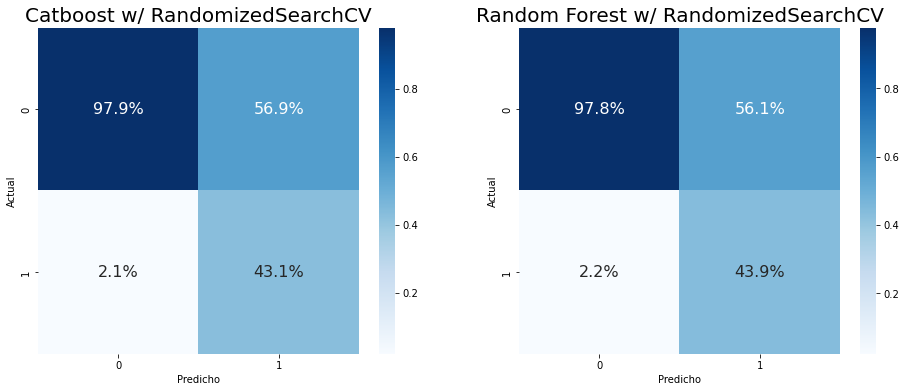

In [ ]:
# Graficamos la matriz de confiusión para cada algoritmo de clasificación

conf_mx0 = confusion_matrix(y_test_pred, test_pred_cat)
#conf_mx1 = confusion_matrix(y_test, test_pred_lr)
conf_mx1 = confusion_matrix(y_test_pred,test_pred_rf)
heat_cm0 = pd.DataFrame(conf_mx0, columns=np.unique(y_test_pred), index = np.unique(y_test_pred))
heat_cm0.index.name = 'Actual'
heat_cm0.columns.name = 'Predicho'

heat_cm1 = pd.DataFrame(conf_mx1, columns=np.unique(y_test_pred), index = np.unique(y_test_pred))
heat_cm1.index.name = 'Actual'
heat_cm1.columns.name = 'Predicho'

#heat_cm2 = pd.DataFrame(conf_mx2, columns=np.unique(y_test), index = np.unique(y_test))
#heat_cm2.index.name = 'Actual'
#heat_cm2.columns.name = 'Predicho'
f, ax = plt.subplots(1,2, figsize=(14,6)) 
f.subplots_adjust(left=None, bottom=None, right= 1, top=None, wspace=None, hspace= None)


sns.heatmap(heat_cm1/np.sum(heat_cm1), cmap="Blues", annot=True,  annot_kws={"size": 16},fmt='.1%', ax = ax[1])
ax[1].set_title('Random Forest w/ RandomizedSearchCV', fontsize = 20)
sns.heatmap(heat_cm0/np.sum(heat_cm0), cmap="Blues", annot=True,  annot_kws={"size": 16},fmt='.1%', ax = ax[0])
ax[0].set_title('Catboost w/ RandomizedSearchCV', fontsize = 20)
#sns.heatmap(heat_cm2, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[2])
#ax[2].set_title('Random Forest ', fontsize = 20)

plt.show()

In [ ]:
print(classification_report(y_test, test_pred_cat, target_names=label))

               precision    recall  f1-score   support

  Fin.Estable       0.98      0.98      0.98      1980
Fin.Inestable       0.38      0.41      0.39        66

     accuracy                           0.96      2046
    macro avg       0.68      0.69      0.69      2046
 weighted avg       0.96      0.96      0.96      2046



Como vemos ahora validando los modelos con los datos de prueba , podemos observar como la metrica de F1 Score y las demás métricas son parecidas cuando usamos el algoritmo CATBOOST y RandomForest, por lo tanto, en este caso la mejor desición seria utilizar RandomForest porque éste algoritmo puede reconocer mejor a la clase minoritaria incluso cuando éste reconoce a algunas empresas que no estÁn cerca de caer en bancarrota como si lo estuvieran. Finalmente se pudieran utilizar los dos Algoritmos por su parecido en los resultados.



In [ ]:
print(classification_report(y_test, test_pred_rf , target_names=label))

               precision    recall  f1-score   support

  Fin.Estable       0.98      0.98      0.98      1980
Fin.Inestable       0.42      0.42      0.42        66

     accuracy                           0.96      2046
    macro avg       0.70      0.70      0.70      2046
 weighted avg       0.96      0.96      0.96      2046



CONCLUSIÓN:

Como se puede observar de los resultados, todos los algoritmos evaluados tienen problemas para detectar las compañias que están cerca de bancarrota, el algoritmo que reconoce mejor las observaciones de la clase minoritaria (Bankruptcy?=1), es el de Regresión Logística optimizado con validación cruzada "RandomizedSearchCV".

En cuanto a la primera obseración se puede constatar que incluso cuando observamos que el algoritmo sacrifica la precisión por el hecho de que tiene  mayor ocurrencia de predicción de falsos negativos, es más conveniente identificar erroneamente un caso que en realidad no esta cerca de la bancarrota como que lo estuviera, que viceversa.

Desde el punto de vista anterior a simple vista se pudiese llegar a una escogencia a priori de un algoritmo para construir el modelo predictivo, sin embargo y el objetivo final para contruir un modelo preditivo confiable es conseguir un algoritmo de clasificación que minimice la insicendia de Falsos Negativos y Falsos positivos a la vez que se obtienen métricas de certeza, precisión y confiabilidad adecuadas.

Es importante resaltar que en todos los algoritmos evaluados se utilizó un Splitting de datos con validación cruzada estratificada para sets de Datos desbalanceados, aplicando la técnica de oversampling llamada SMOTE,  

Se realizaron cálculos utilizando otro tipo de validación cruzada como técnica de optimización como lo es GridSearchCV aplicada a Random Forest para comparar y ver si mejoraban las métricas y se evidenció que se obtuvieron métricas con score mas bajo y los tiempos de corrida para este caso aumentaron x11 veces respecto de los tiempos obtenidos con la tecnica de RandomizedSearchCV.